In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("student_scores.csv")

In [4]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,21848.000000,20731.00000,21847.000000,21847.000000,21847.000000
mean,495.983706,2.13680,66.605392,69.418776,68.473658
std,289.234209,1.47404,15.390304,14.761198,15.455862
min,0.000000,0.00000,0.000000,11.000000,6.000000
25%,244.000000,1.00000,56.000000,59.000000,58.000000
50%,495.000000,2.00000,67.000000,70.000000,69.000000
75%,746.000000,3.00000,78.000000,80.000000,79.000000
max,999.000000,7.00000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21848 entries, 0 to 21847
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           21848 non-null  int64  
 1   Gender               21848 non-null  object 
 2   EthnicGroup          20555 non-null  object 
 3   ParentEduc           20523 non-null  object 
 4   LunchType            21848 non-null  object 
 5   TestPrep             20548 non-null  object 
 6   ParentMaritalStatus  20995 non-null  object 
 7   PracticeSport        21389 non-null  object 
 8   IsFirstChild         21155 non-null  object 
 9   NrSiblings           20731 non-null  float64
 10  TransportMeans       19602 non-null  object 
 11  WklyStudyHours       21170 non-null  object 
 12  MathScore            21847 non-null  float64
 13  ReadingScore         21847 non-null  float64
 14  WritingScore         21847 non-null  float64
dtypes: float64(4), int64(1), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1293
ParentEduc             1325
LunchType                 0
TestPrep               1300
ParentMaritalStatus     853
PracticeSport           459
IsFirstChild            693
NrSiblings             1117
TransportMeans         2246
WklyStudyHours          678
MathScore                 1
ReadingScore              1
WritingScore              1
dtype: int64

In [8]:
df=df.drop("Unnamed: 0",axis=1)


In [9]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5       71.0          71.0          74.0  


In [10]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("10-May","5-10")

In [11]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45.0,56.0,42.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76.0,78.0,75.0


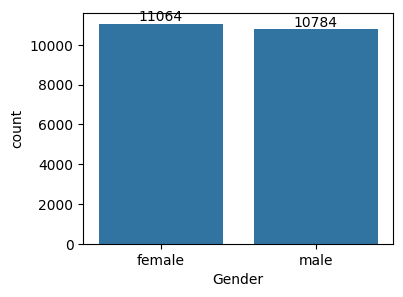

In [12]:
plt.figure(figsize=(4,3))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.show()


In [13]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.406543     71.201370     70.354045
bachelor's degree   70.586460     73.303018     73.521615
high school         64.418518     67.148490     65.336162
master's degree     72.421662     76.017030     76.611035
some college        66.342997     69.075250     68.421232
some high school    62.677859     65.632921     63.823529


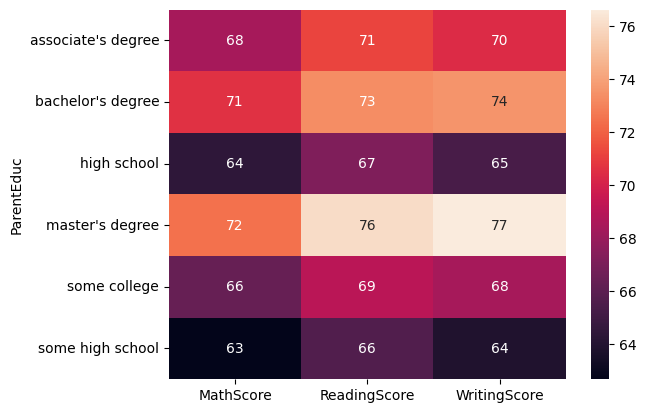

In [14]:
sns.heatmap(gb,annot=True)
plt.show()

From this heatmap we can conclude that ParentEducation is directly effecting the Marks of students.

In [15]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.467820     69.491069     68.687837
married              66.778822     69.536350     68.582349
single               66.169225     69.065577     68.044250
widowed              68.116822     69.971963     68.964953


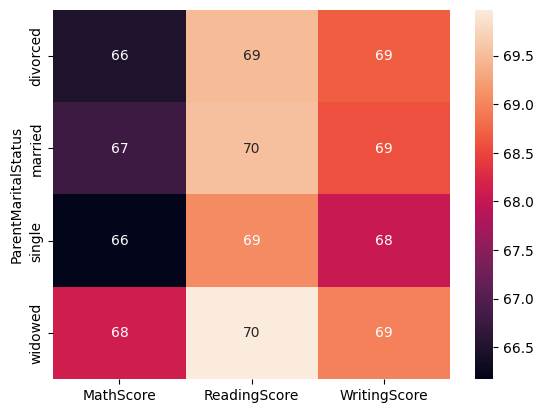

In [16]:
sns.heatmap(gb1,annot=True)
plt.show()

There is no effect of ParentMaritalStatus on  Students marks

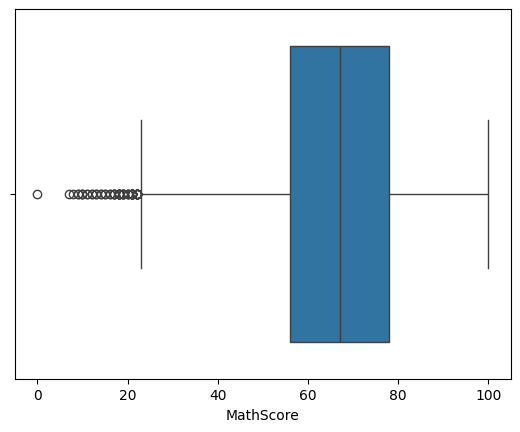

In [17]:
sns.boxplot(data=df,x="MathScore")
plt.show()

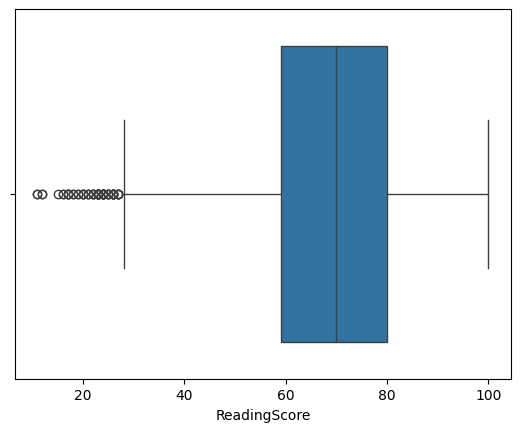

In [18]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()



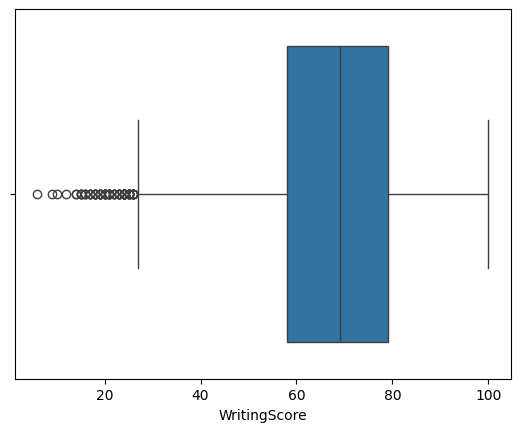

In [19]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

In [21]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


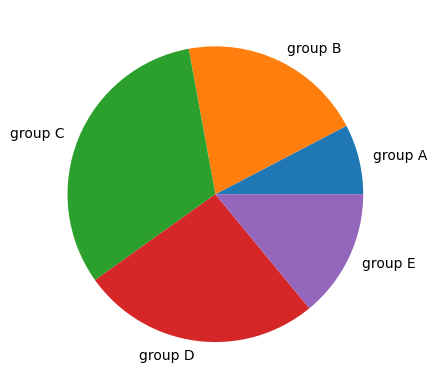

In [39]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
groupB=df.loc[(df['EthnicGroup']=="group B")].count()
groupC=df.loc[(df['EthnicGroup']=="group C")].count()
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupE=df.loc[(df['EthnicGroup']=="group E")].count()
l=["group A","group B","group C","group D","group E"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist,labels=l)
plt.show()

[Text(0, 0, '6574'),
 Text(0, 0, '4158'),
 Text(0, 0, '1574'),
 Text(0, 0, '5364'),
 Text(0, 0, '2885')]

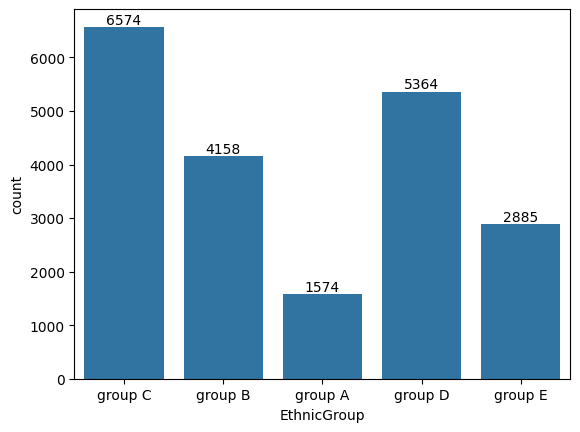

In [42]:
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0])